# Lab Week 6: FFT review; Convolution

### 19 February 2018

# Goals #

After doing this lab, you should be able to:
* Use convolution to apply reverb to a signal
* Use convolution to apply other effects for a specific impulse response
* Use listening, plotting waveforms, and plotting spectra to reason about the effects of convolution with an impulse response

# 0.1. Are you caught up on labs?

A portfolio of your first four labs was due on 16 February. If you haven't turned that in yet, please see the assignment here: https://learn.gold.ac.uk/mod/assign/view.php?id=514281

By now, you should find it easy to:

1. Synthesize a sine wave with an arbitrary amplitude, frequency, and phase offset, then play that wave back. If you don't know how to to this, revisit week 3's lab (https://learn.gold.ac.uk/mod/resource/view.php?id=512068)
2. Compute and plot an FFT of an arbitrary 1-dimensional signal (e.g. an audio wave). If you don't know how to do this, revisit week 4's lab (https://learn.gold.ac.uk/mod/resource/view.php?id=512185)
3. Use the spectrum computed by the FFT to reason about the frequencies in a sound (week 5: https://learn.gold.ac.uk/mod/resource/view.php?id=513559)

__Don't forget that you may be asked about using Jupyter and Python for this type of synthesis and analysis on the exam, so now is the time to try it out and ask for help if you have problems!__

# Part 1: FFT Review #

Use the markdown cell below to answer the following questions. If you're not sure what the answers are, try writing some code, using Python help (`?` followed by the function name), or reviewing the lecture slides. Or ask for help!

A. In the code below, how many elements are in `s`?

`t = np.arange(0, 1, 1/2000)
s = sin(2*pi*100*t) + 0.5 * sin(2*pi*200*t)`

B. In the code below, what is the size of the FFT being taken?

`f = fft.fft(s[0:1000])`

C. How many FFT bins does f have?

D. What frequency corresponds to the first bin (`f[0]`)?

E. What frequency corresponds to the second bin (`f[1]`)?

F. How do you compute the magnitude of bin `f[1]`?

G. What bin corresponds to 100Hz?

H. What bin do you expect to have the highest magnitude?
 


A. 

There are 2000 elements in s, since the t array is defined with a step size of 1/2000, or 2000 steps, and the s array is a transformation of it.

B.

1000: the input array is sliced from the 0th to 1000th index.

C. 

There will be 500 bins, as the number of bins in an FFT corresponds to the number of samples / 2.

D. 

0hz (first bin will always be 0hz)

E. 

2hz (fft size of 1000, so fft.fftfreq(1000)[1] corresponds to 0.001hz. Then multiply this by 2000 as our sampling rate is 2Khz)

F.

First calculate the spectrum by calling the fft function and specifying the index as follows:

spec = fft.fft(s)[1]

Then calculate the magnitude by taking an absolute value:

magspec = abs(spec)

G. 

Bin 50 

(fft.fftfreq(1000)[50]*2000)

H. 

argmax(s[0:1000]) = 823

Using the argmax command, I can discover that in the range of 0 to 1000, bin 823 has the highest magnitude.


# Part 2: Convolution Reverb in Python #

Last term, we saw that you can apply reverb to a sound using convolution. Specifically, you can apply a reverb by:
1. Recording an impulse response in a space (i.e., record an "impulse" sound like a clap
or air gun, using a microphone placed in some position in the space); then
2. Convolving that impulse response recording with a new sound, to make it sound like the sound took place in the same acoustic environment where the impulse
response was recorded.

In lab 9 from 15 December you computed the convolution by hand in Processing. 
 - PDF: https://learn.gold.ac.uk/mod/resource/view.php?id=503675
 - p5 code: https://learn.gold.ac.uk/mod/resource/view.php?id=503676

Here, you'll see how easy it is to do this task in Python.

a. Download the following audio files and store them in the same directory as this lab file:
* http://www.doc.gold.ac.uk/~mas01rf/PMC2014-15/IPython/lab14/noise.wav
* http://www.doc.gold.ac.uk/~mas01rf/PMC2014-15/IPython/lab14/robot.wav
* http://www.doc.gold.ac.uk/~mas01rf/PMC2014-15/IPython/lab14/saw.wav
* http://www.doc.gold.ac.uk/~mas01rf/PMC2014-15/IPython/lab14/sinMandolin1.wav
* http://www.doc.gold.ac.uk/~mas01rf/PMC2014-15/IPython/lab14/sinMandolin2.wav
* http://www.doc.gold.ac.uk/~mas01rf/PMC2014-15/IPython/lab13/song1.wav

(This last one is an exceprt downloaded from 

http://freemusicarchive.org/music/Jahzzar/Travellers_Guide/Siesta)

Now load them into variables:

In [2]:
noise = wavReadMono("noise.wav")
robot = wavReadMono("robot.wav")
saw = wavReadMono("saw.wav")
sinMandolin1 = wavReadMono("sinMandolin1.wav")
sinMandolin2 = wavReadMono("sinMandolin2.wav")
song1 = wavReadMono("song1.wav")


b. Download a free convolution reverb pack from http://www.voxengo.com/impulses/ and store the .wav files in the same directory as this lab file.

c. Listen to the .wav files in this pack (e.g., using Audacity). Notice that they each sound a bit like a hand clap in a reverberant space.

d. Choose one of the .wav files to apply to some new sounds. Load it into an array variable here:

In [20]:
block_inside = wavReadMono("./impulses/Block Inside.wav")
play(block_inside)

e. Plot the waveform of your reverb file. 

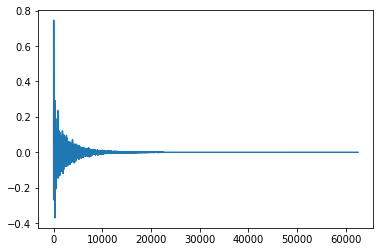

In [13]:
plot(block_inside)

f. In Python, we can simply use the `convolve()` function to convole two singals. Apply your reverb to the `robot` sound using the code below, which also normalises the waveform so that it stays in the range between -1 and 1:

In [26]:
#convolve the reverb and the robot
reverb_robot = convolve(block_inside, robot) 
#normalize: divide by the maximum absolute value in the signal
reverb_robot /= max(abs(reverb_robot))

g. When you play the normalised sound, it should sound like a reverberant robot! 

In [27]:
play(reverb_robot)

h. Now experiment with some other sounds and reverbs.

In [34]:
deep_space = wavReadMono("./impulses/Deep Space.wav")
st_nicolaes_church = wavReadMono("./impulses/St Nicolaes Church.wav")

def conv(impulse, sound):
    conv = convolve(impulse, sound)
    conv /= max(abs(conv))
    play(conv)

#conv(deep_space, noise)
conv(st_nicolaes_church, sinMandolin1)

    
    


# Part 3: Using Convolution for Other Effects #

As we will see in class on Thursday, many other audio effects are also applied by __convolving a sound with a special signal, called an impulse response__.

Run the code below to specify two impulse response signals, `h1` and `h2`. Notice that these signals are simply __arrays__.

In [4]:
h1 = [0.5, 0.5]
h2 = [1/10, 1/10, 1/10, 1/10, 1/10, 1/10, 1/10, 1/10, 1/10, 1/10]

Make sure you've run the code in Part 2 to load audio clips into `song1` and `noise`. Then run the code below to apply the simple effects represented by `h1` and `h2` to `song1` and `noise`: 

In [5]:
song1_h1 = convolve(song1, h1)
song1_h2 = convolve(song1, h2)
noise_h1 = convolve(noise, h1)
noise_h2 = convolve(noise, h2)

Now listen to `song1`, `song1_h1`, and `song1_h2`. Do you hear a difference? If so, what?


In [13]:
play(song1)
play(song1_h1)
play(song1_h2)

Now listen to `noise`, `noise_h1`, and `noise_h2`. Do you hear a difference? If so, what?



In [ ]:
play(noise)
play(noise_h1)
play(noise_h2)

Plot the first 100 samples of `song1`, `song1_h1`, and `song1_h2`. How do they compare?

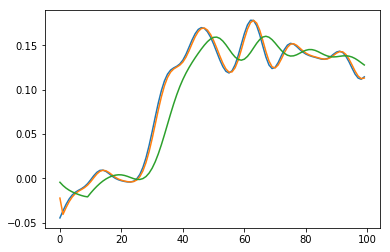

In [23]:
#fill this in and discuss how they compare
plot(song1[0:100])
plot(song1_h1[0:100])
plot(song1_h2[0:100])

Now do the same thing for the first 100 samples of `noise`, `noise_h1`, and `noise_h2`. What is the relationship between them?

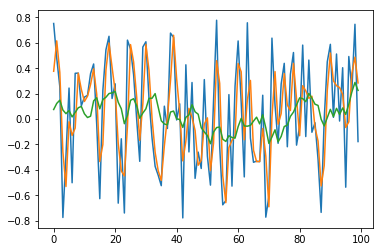

In [20]:
# fill this in and discuss the relationship between these signals
#plot(abs(fft.fft(noise)))
#plot(abs(fft.fft(noise_h2)))
plot(noise[0:100])
plot(noise_h1[0:100])
plot(noise_h2[0:100])


In general, what effects do convolving a sound with `h1` and `h2` seem to have on the waveforms?

<b>A)</b><p>
Both audibly and visibly, it is clear that convolving the input sounds with both of the impulse arrays results in an attentuation of frequencies in the higher end of the spectrum. 

h1 has a very subtle affect that is difficult to perceive, while h2 is very noticeable, and sounds similar to a simple low-pass filter. 

Now compare the spectra of `song1`, `song1_h1`, and `song1_h2`, as well as the spectra of `noise`, `noise_h1`, and `noise_h2`.

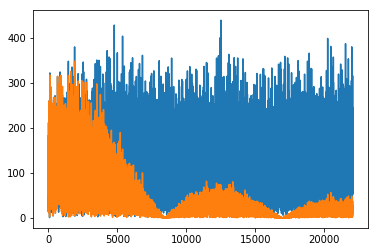

In [21]:
def compute(input):
    n = size(input)
    spec = fft.fft(input[0:n])
    magspec = abs(spec)
    plot(magspec[0:22050])
    
def all_song1_spectrums(n):
    compute(song1)
    compute(song1_h1)
    compute(song1_h2)
    
def all_noise_spectrums():
    compute(noise)
    compute(noise_h1)
    compute(noise_h2)

compute(noise)
compute(noise_h2)





In general, what effects do convolving a sound with `h1` and `h2` seem to have on the spectra?

<b>A)</b><p>
Convolving a sound h1 and h2 result in a general attentuation of higher frequencies. 

With song1, you can see that there are some peaks around 16kHz and 19kHz that are somewhat affected, however the overall spectrum is near-identical. h2 is similar, but with a more profound affect at the aforementioned peaks and in general.

As noise contains an equal proportion of all frequencies, the affect of these kinds of operations is more obvious. You can see a clear attentuation of higher frequencies from around 5kHz upwards. From around 12kHz, the affect becomes more drastic. The effect of h2 on noise is much more intense, with a sharp attenuation occuring from around 2.5kHz onwards. Just before 10kHz, there are some unusual features where the spectrum increases in magitude again in a sinusoidal shape. I felt that this may have been due to some sort of aliasing occuring with the convolution process.